<a href="https://colab.research.google.com/github/olmagra/Proyecto_Predicciones-de-ventas/blob/main/Prediccion_Ventas_Alimentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PREDICCIONES DE VENTAS ALIMENTICIAS**






In [33]:
#Importar biblioteca Pandas
import pandas as pd
import numpy as np

In [34]:
#Activar Google Drive para poder cargar archivos de allí
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
# Código trabajado en ayudantías con el profesor Jesús
#Se requiere esta instrucción para que 'traduzca' la url original en una que entienda Python
def format_drive_url(url):
    file_id = url.split('/')[-2]
    download_url = f'https://drive.google.com/uc?id={file_id}&export=download'
    return download_url

In [36]:
#Cargar los datos desde la url indicada en el proyecto:
url = 'https://drive.google.com/file/d/1syH81TVrbBsdymLT_jl2JIf6IjPXtSQw/view?usp=sharing'
url=format_drive_url(url)
print(url)
df = pd.read_csv(url)
df.head()

https://drive.google.com/uc?id=1syH81TVrbBsdymLT_jl2JIf6IjPXtSQw&export=download


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


1) ¿Cuántas filas y columnas?
Respuesta: 12 columnas y 8523 filas (incluyendo la de encabezado).
Información extraida con la función info()

2) ¿Cuáles son los tipos de datos en cada variable?

In [37]:
#=> Código tomado del cuaderno de limpieza: https://colab.research.google.com/drive/1zuye5dvjhqZge2rc1tDh_jY3X9FHBzqH#scrollTo=QKiXdVHhNahS
df.info() #Información sobre el DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [39]:
#=> Código tomado de stack overflow: https://stackoverflow.com/questions/33251320/dataframe-object-has-no-attribute-sample
df.sample(5) #Saco una muestra aleatorio de 10 registros para explorar la información

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
6985,FDH31,NaN,Regular,0.020312,Meat,98.1042,OUT027,1985,Medium,Tier 3,Supermarket Type3,2777.7176
2950,DRD15,NaN,Low Fat,0.099442,Dairy,233.1642,OUT019,1985,Small,Tier 1,Grocery Store,697.0926
8017,FDL43,10.1,Low Fat,0.027064,Meat,76.3670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700
8317,FDN13,18.6,Low Fat,0.152367,Breakfast,98.5358,OUT045,2002,NaN,Tier 2,Supermarket Type1,1306.9654
1081,FDV43,16.0,Low Fat,0.076975,Fruits and Vegetables,46.2086,OUT049,1999,Medium,Tier 1,Supermarket Type1,490.6946


3) ¿Hay duplicados? Si es el caso, eliminen algunos duplicados.

In [40]:
#=> Código tomado del cuaderno de limpieza: https://colab.research.google.com/drive/1zuye5dvjhqZge2rc1tDh_jY3X9FHBzqH#scrollTo=QKiXdVHhNahS
df.duplicated().sum() #Buscar y sumar duplicados

0

4) Identifiquen los valores faltantes. Respuesta: Hay valores faltantes en las columnas: 'Item_Weight' y 'Outlet_Size'

In [41]:
#=> Código tomado del cuaderno de limpieza: https://colab.research.google.com/drive/1zuye5dvjhqZge2rc1tDh_jY3X9FHBzqH#scrollTo=QKiXdVHhNahS
df.isna().sum() #Identifica los valores faltantes por columna 

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

5) Decidan cómo abordar los valores faltantes y cómo hacerlo. (Esto requiere sus criterios, así que expliquen su elección).

In [42]:
df.set_index #Reseteo el índice por las modificaciones que he hecho en el Dataframe y para eviatr errores

<bound method DataFrame.set_index of      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OU

In [43]:
#Otra forma de reindexar:
df.shape
df.columns
df.index

RangeIndex(start=0, stop=8523, step=1)

In [44]:
df.values #Convierto el Dataframe en un arreglo de NUmpy porque algunas funciones lo requieren y para evitar errores

array([['FDA15', 9.3, 'Low Fat', ..., 'Tier 1', 'Supermarket Type1',
        3735.138],
       ['DRC01', 5.92, 'Regular', ..., 'Tier 3', 'Supermarket Type2',
        443.4228],
       ['FDN15', 17.5, 'Low Fat', ..., 'Tier 1', 'Supermarket Type1',
        2097.27],
       ...,
       ['NCJ29', 10.6, 'Low Fat', ..., 'Tier 2', 'Supermarket Type1',
        1193.1136],
       ['FDN46', 7.21, 'Regular', ..., 'Tier 3', 'Supermarket Type2',
        1845.5976],
       ['DRG01', 14.8, 'Low Fat', ..., 'Tier 1', 'Supermarket Type1',
        765.67]], dtype=object)



*   Valores faltantes en la columna Outlet_Size

In [45]:
#Código tomado de la lección 'GroupBy' https://login.codingdojo.com/m/502/12397/86623
#Agrupo las columnas que creo están relacionadas con la columna 'Outlet_Size':
df.groupby(['Outlet_Type', 'Outlet_Size', 'Outlet_Location_Type'])['Item_Outlet_Sales'].sum()


Outlet_Type        Outlet_Size  Outlet_Location_Type
Grocery Store      Small        Tier 1                  1.796941e+05
Supermarket Type1  High         Tier 3                  2.142664e+06
                   Medium       Tier 1                  2.183970e+06
                   Small        Tier 1                  2.118395e+06
                                Tier 2                  2.268123e+06
Supermarket Type2  Medium       Tier 3                  1.851823e+06
Supermarket Type3  Medium       Tier 3                  3.453926e+06
Name: Item_Outlet_Sales, dtype: float64

In [46]:
#Luego de hacer este GroupBy saco dos conclusiones para llenar los nulos de la columna ''Outlet_Size':
#  1. Los 'Outlet_Type' del tipo 'GroceryStore' son 'Small' (todos los campos no nulos están llenos con este valor)
#  2. Los 'Outlet_Type' del tipo 'Supermarket Type1' y 'Outlet_Location_Type' = 'Tier 2' también son del tamaño 'Small' pues todos los campos no nulos tienen ese valor
#así que llenaré los datos faltantes que cumplan con estos criterios con el valor 'Small'

#=> Código trabajado en clase con el profesor Patricio Olivares
#Voy a filtrar todos aquellos Outlet_type que sea de tipo 'Grocery Store'
filter_outlet1 = df['Outlet_Type'] == 'Grocery Store'

#Aplicar este filtro sobre el DataFrame y luego de aplicado llenaremos los valores nulos con el valor 'Small'
df.loc[filter_outlet1, ['Outlet_Size']] = df.loc[filter_outlet1, ['Outlet_Size']].fillna('Small')

In [47]:
df.isna().sum() #Verifico cuántos valores faltantes quedan

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1855
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [49]:
#Voy a filtrar todos aquellos Outlet_type que sea de tipo 'Supermarket Type1' y con Outlet_Location_Type' = 'Tier 2'
filter_outlet2 = df['Outlet_Type'] == 'Supermarket Type1'
filter_outlet2 = df['Outlet_Location_Type'] == 'Tier 2'

#Aplicar este filtro sobre el DataFrame y luego de aplicado llenaremos los valores nulos con el valor 'Small'
df.loc[filter_outlet2, ['Outlet_Size']] = df.loc[filter_outlet2, ['Outlet_Size']].fillna('Small')

In [50]:
df.isna().sum() #Identifica los valores faltantes por columna 

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [51]:
df['Outlet_Size'].value_counts() #Cuento valores para revisar como quedó la categoría:

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

# *   Valores faltantes en la columna 'Item_Weight'
Para esta columna una de las opciones que analicé es si se podía borrar, sin embargo los datos nulos representan menos dle 50% del total, de modo que descarté esa opción.



In [52]:
#=> Código tomado del cuaderno de limpieza: https://colab.research.google.com/drive/1zuye5dvjhqZge2rc1tDh_jY3X9FHBzqH#scrollTo=QKiXdVHhNahS
df.nunique() #Examina los valores únicos de las columnas

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [53]:
#Busqué otras columnas que pudieran tener relación con 'Item_Weight'. Veo que 'Item_Identifier' tiene 1559 valores únicos
#y por su nombre puedo deducir que hay un código por cada artículo
# y que quizá pueda encontrar los valores para 'Item_Weight' nulos relacionándolo con 'Item_Identifier'

#=> Código tomado de notas de clase y lecciones
df.sort_values(by = 'Item_Identifier') #Decido ordenar por esta columna para ver que encuentro
#Efectivamente veo que para cada 'Item_Identifier' el 'Item_Weight' es el mismo

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8043,DRA12,11.60,Low Fat,0.068535,Soft Drinks,143.0154,OUT010,1998,Small,Tier 3,Grocery Store,283.6308
118,DRA12,11.60,Low Fat,0.041178,Soft Drinks,140.3154,OUT017,2007,Small,Tier 2,Supermarket Type1,2552.6772
1693,DRA12,11.60,LF,0.000000,Soft Drinks,141.9154,OUT035,2004,Small,Tier 2,Supermarket Type1,992.7078
1197,DRA12,11.60,Low Fat,0.000000,Soft Drinks,141.6154,OUT045,2002,Small,Tier 2,Supermarket Type1,3829.0158
1245,DRA12,11.60,Low Fat,0.040912,Soft Drinks,142.3154,OUT013,1987,High,Tier 3,Supermarket Type1,2552.6772
...,...,...,...,...,...,...,...,...,...,...,...,...
7926,NCZ54,14.65,Low Fat,0.083489,Household,161.3552,OUT049,1999,Medium,Tier 1,Supermarket Type1,7148.0288
214,NCZ54,14.65,Low Fat,0.000000,Household,161.5552,OUT010,1998,Small,Tier 3,Grocery Store,324.9104
1896,NCZ54,NaN,Low Fat,0.082956,Household,164.0552,OUT027,1985,Medium,Tier 3,Supermarket Type3,5523.4768
7166,NCZ54,NaN,Low Fat,0.145952,Household,160.9552,OUT019,1985,Small,Tier 1,Grocery Store,162.4552


In [54]:
#Agrupo el DataFrame por la columna Item_Identifier y cuento para saber cuántas veces se repite cada ítem
df.groupby(['Item_Identifier'])['Item_Weight'].count()

Item_Identifier
DRA12    6
DRA24    5
DRA59    6
DRB01    2
DRB13    5
        ..
NCZ30    6
NCZ41    5
NCZ42    5
NCZ53    4
NCZ54    5
Name: Item_Weight, Length: 1559, dtype: int64

In [55]:
#Código tomado de: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transform.html
#Agrupo 'Item_Identifier' haciendo un promedio de 'Item_Weight'
#Con la función transform convierto en dato 'Item_Weight' nulo en el promedio de los 'no nulos' para cada 'Item_Identifier':
df['Item_Weight'] = df.groupby('Item_Identifier')['Item_Weight'].transform('mean')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


6) Confirmen que no hay valores faltantes después de abordarlos.

In [56]:
df.isna().sum() #Revisamos que ninguna columna tenga valor nulo

Item_Identifier              0
Item_Weight                  4
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [57]:
#=> Código tomado del cuaderno de limpieza: https://colab.research.google.com/drive/1zuye5dvjhqZge2rc1tDh_jY3X9FHBzqH#scrollTo=QKiXdVHhNahS
#Quedaron 4 datos faltantes. Para esos considerando que eson pocos y que la columna es tipo 'flotante', elegí usar el promedio para llenar los valores nulos.
median_weight = df['Item_Weight'].mean() #Calcula el promedio de la columna
df['Item_Weight'].fillna(median_weight, inplace=True) #Llena los valores nulos de esta columna con el promedio hallado

In [58]:
#=> Código tomado del cuaderno de limpieza: https://colab.research.google.com/drive/1zuye5dvjhqZge2rc1tDh_jY3X9FHBzqH#scrollTo=QKiXdVHhNahS
df.isna().sum() #Revisamos que ninguna columna tenga valor nulo

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

7) Encuentren y arreglen alguna categoría inconsistente de datos (example: fix cat, Cat, and cats so that they are consistent) 

In [59]:
#=> Código tomado del cuaderno de limpieza: https://colab.research.google.com/drive/1zuye5dvjhqZge2rc1tDh_jY3X9FHBzqH#scrollTo=QKiXdVHhNahS

#Revisar las columnas categóricas:

#  Conteo de valores de la coumna 'Item_Fat_Content'
df['Item_Fat_Content'].value_counts()
# Se detecta que no hay uniformidad y hay que estandarizarlos

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [60]:
#    Estandarizar la categoría en la columna 'Item_Fat_Content'
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [61]:
#  Revisión de los demás datos categóricos
df['Item_Type'].value_counts() #Cuento valores de esta columna para revisar que sean coherentes
# Los valores de esta categoría está OK

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [62]:
#  Revisión de los demás datos categóricos
df['Outlet_Identifier'].value_counts() #  Conteo de valores de la coumna 'Outlet_Identifier'
# Los valores de esta categoría está OK

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [63]:
#  Revisión de los demás datos categóricos
df['Outlet_Type'].value_counts() #  Conteo de valores por columna
# Los valores de esta categoría está OK

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [64]:
#  Revisión de los demás datos categóricos
df['Outlet_Location_Type'].value_counts() #  Conteo de valores de la coumna
# Los valores de esta categoría está OK

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

8) Para cualquier columna numérica, obtengan las estadísticas resumidas para cada uno (mínimo, máximo y media)

In [65]:
df['Item_MRP'].min() #Para la columna 'Item_MRP' calculo el valor mínimo

31.29

In [66]:
df['Item_MRP'].max() #Para la columna 'Item_MRP' calculo el valor máximo

266.8884

In [67]:
df['Item_MRP'].mean() #Para la columna 'Item_MRP' calculo la media o promedio

140.9927819781767

# **VISUALIZACIÓN DE LOS DATOS**

In [68]:
#Importar bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [69]:
#=> Código tomado de notas de clase y lecciones Coding Dojo
df.describe() #Trae los principales datos estadísticos del DataFrame:

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.875420,0.066132,140.992782,1997.831867,2181.288914
std,4.645008,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026989,93.826500,1987.000000,834.247400
50%,12.650000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Histograma para ver las distribuciones de diversas características en el conjunto de datos

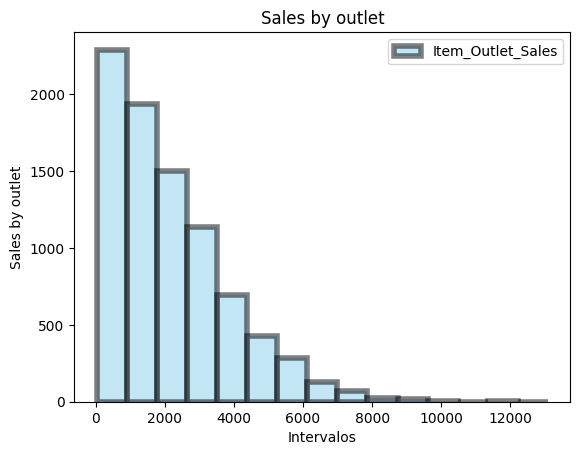

In [145]:
#=> Código tomado de https://matplotlib.org

#Histograma para las ventas por outlet:
data_sales = df['Item_Outlet_Sales'] #Define los datos para el histograma
plt.hist(data_sales, bins=15, ec="black", alpha = 0.5, lw=4, color= 'skyblue', label='Item_Outlet_Sales') #Características del histograma
plt.legend() #Legenda
plt.title("Sales by outlet")
plt.ylabel('Frequency')
plt.xlabel('Sales by outlet')
plt.show() #Muestra los histogramas

In [ ]:
#Observo que los datos no tienen una distribución normal y tienen una mayor frecuencia a la izquierda,
# lo que significa que son más frencuentes las ventas bajas que las altas por cada 'Outlet'

<Axes: >

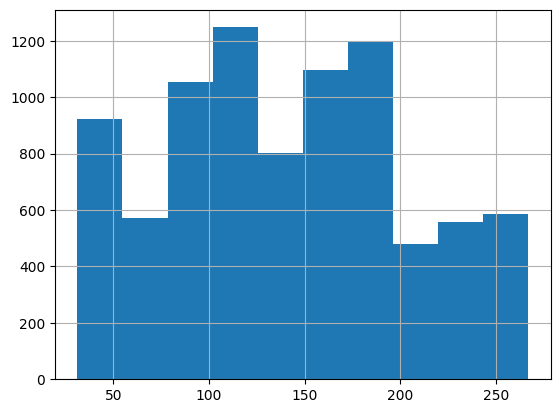

In [144]:
df['Item_MRP'].hist() # Hacer un histogram con la columna de precios con ajustes por defecto para entender la distribución de los datos

In [ ]:
#Encuentro una mayor variabildad en los precios que en las venta
#Seguiré investigadno para saber con cuál variable se relaciona

Boxplot para ver resúmenes estadísticos de diversas características en el conjunto de datos.

In [72]:
#=> Código tomado de https://matplotlib.org/stable/tutorials/introductory/quick_start.html

# Convertir los datos en arreglo de Numpy para poder usarlos en los gráficos:
data_visi = np.array('Item_Visibility'.index) #Crea una serie de datos de Numpy para esta columna
data_visi

array(<built-in method index of str object at 0x7fa34608a130>,
      dtype=object)

In [73]:
#=> Código tomado de https://matplotlib.org/stable/tutorials/introductory/quick_start.html

# Convertir los datos en arreglo de Numpy para poder usarlos en los gráficos:

data_sales = np.array('Item_Outlet_Sales'.index) #Crea una serie de datos de Numpy para esta columna
data_sales

array(<built-in method index of str object at 0x7fa3489a6490>,
      dtype=object)

Text(0.5, 1.0, 'Sales by Outlet type')

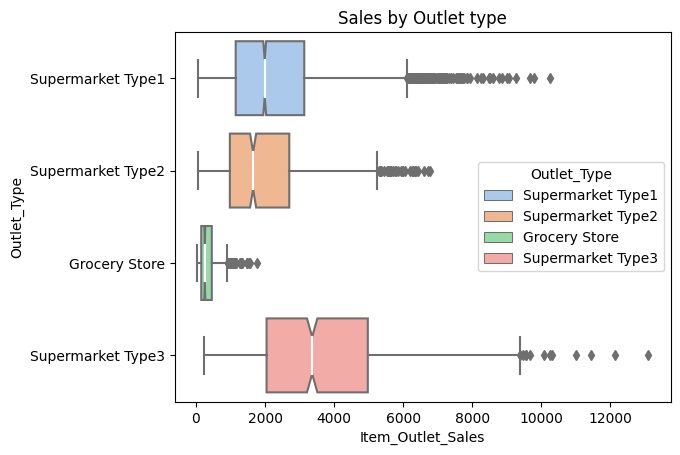

In [104]:
#=> Código tomado de: https://seaborn.pydata.org/generated/seaborn.boxplot.html
sns.boxplot(data=df, x="Item_Outlet_Sales", y="Outlet_Type",hue="Outlet_Type", 
            dodge=False, notch=True, showcaps=True, palette="pastel", medianprops={"color": "white"})
plt.title('Sales by Outlet type')

In [ ]:
#En este gráfico se puede deducir:
#1. Los 4 tipos de 'Outlet' tienen 'outliers'.
#2. Los tipos de outlet 'Supermarket type 3' tienen mayores ventas que los otros tipos. También tienen los datos más dispersos.
#3. En los 4 gráficos se observa un sesgo de la mediana hacia la izquierda, lo que indica que la mayor frecuencia en las ventas
#   se encuentra en las ventas bajas. Esto coincide con la conclusión del primer gráfico.
#En este caso se puede recomendar una estrategia para incrmeentar las ventas aprovechando los metros cuadrados por Outlet
#para lo que convendría agregar a estos datos los metros cuadrados por almacén, y así se podría obtener una métrica un poco más objetiva

Mapa de calor de la correlación entre las características.

<Axes: >

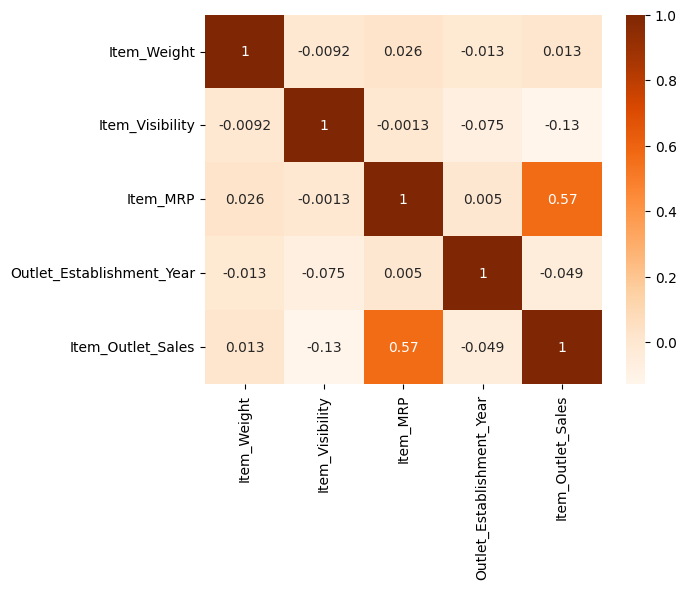

In [110]:
#Código tomado de Coding Dojo: Correlación y mapas de calor
corr = df.corr() #Calcular los coeficientes de correlación entre las características del DataFrame
sns.heatmap(corr, cmap = 'Oranges', annot = True) #Visualizar los coeficientes de relación mediante un mapa de calor

In [ ]:
#Al observar este mapa de calor las conclusione son las siguientes:
#1. No hay correlaciones 'fuertes' entre variables , es decir mayores a 0.7
#2. La correlación más alta que hay es entre las ventas 'Item_Outlet_Sales' y los precios 'Item_MRP'.
#   Esto tiene sentido por lo que en microeconomía se llama 'Elasticidad de la demanda'
#   En cierto tipo de productos (alimentos se incluye), la demanda está influida por el precio.
#3. hay una correlación, aunque muy débil, entre el precio 'Item_MRP' y el peso del artículo 'Item_Weight'
#   Esto lleva a concluir que el precio de los productos es de alguna manera proporcional a su peso, pero influyen en él otros factores
#   como la funcionalidad, el valor de la marca, el nivel de reconocimiento en el mercado.

**Análisis de datos explicativos**

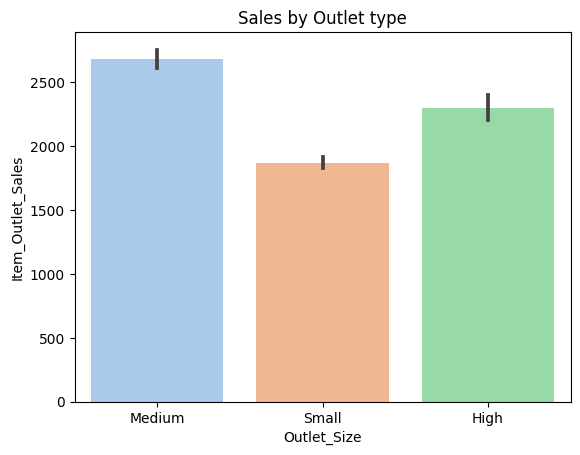

In [149]:
#=> Código tomaod de: http://seaborn.pydata.org/tutorial/categorical.html
sns.barplot(data=df, x="Outlet_Size", y="Item_Outlet_Sales", palette="pastel")
plt.title('Sales by Outlet type')
plt.show()

In [ ]:
#Llama la atención en este gráfico que el tamaño del outlet 'Outlet_Size' no tiene relación directa con la venta, es decir que los 'Outlet' con mayor tamaño (High)
#no sos los que tienen mayor venta. En ese caso se sugeriría una entrategia de optimización de la venta por metro cuadrado de almacén, o un cambio de locación para aquellos
#outlet 'High' con menor potencial de mercado

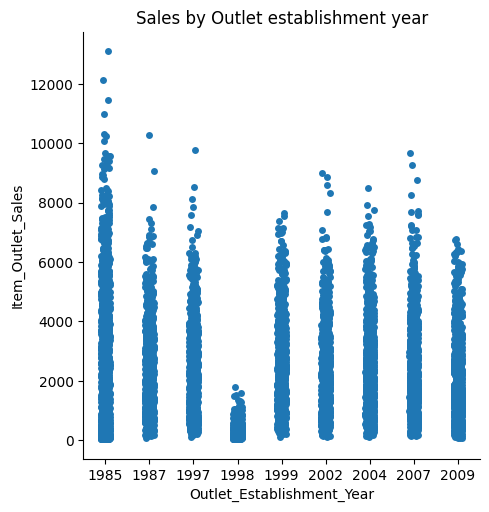

In [129]:
#=> Código tomado de: https://www.youtube.com/watch?v=ncfPK06nKA8
sns.catplot(data=df, x="Outlet_Establishment_Year", y="Item_Outlet_Sales")
plt.title('Sales by Outlet establishment year')
plt.show()

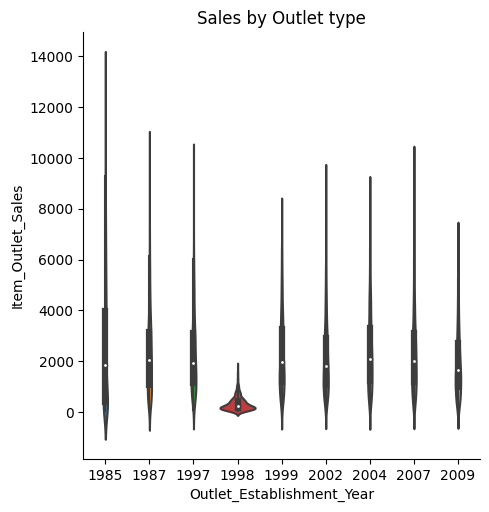

In [121]:
#=> Código tomado de: https://www.youtube.com/watch?v=ncfPK06nKA8
sns.catplot(data=df, x="Outlet_Establishment_Year", y="Item_Outlet_Sales", kind="violin", split=True)
plt.title('Sales by Outlet type')
plt.show()

In [ ]:
#Este gráfico y el anterior permiten identificar que el año 1998 fue un año atípico en las ventas. No hay mucha información acerca del negocio
#Invesigando es probable que a esta empresa la haya afectado la crisis de la "burbuja de las punto com"

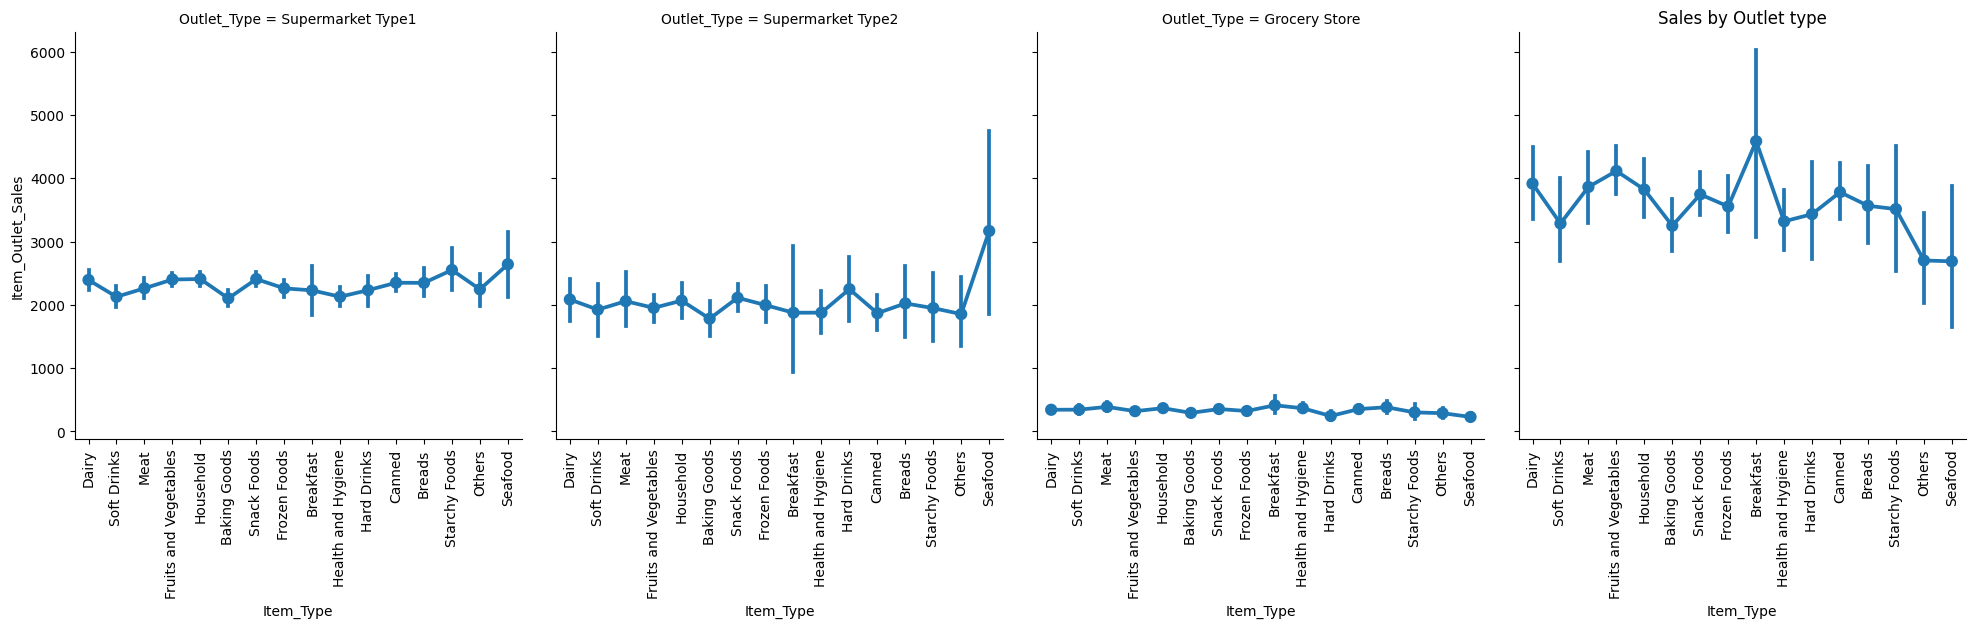

In [137]:
#=> Código tomado de: https://www.youtube.com/watch?v=ncfPK06nKA8
g=sns.catplot(data=df, x="Item_Type", y="Item_Outlet_Sales", kind="point", col="Outlet_Type") #Código trabajado en ayudantías Coding Dojo
plt.title('Sales by Outlet type') #Título del gráfico
g.set_xticklabels(rotation=90) #Inclinación de los label del eje x
plt.show() #Mostrar el gráfico

In [ ]:
#Este tipo de gráfico permite hacer un recorrido por los tipos de productos vendidos (Item_Type) en cada tipo de outlet (Outlet_Type), lo que me permite ver cuáles son los 
#tipos de productos ganadores o más vendidos por cada formato de 'Outlet' Las conclusiones que se sacan son:
#1. Uno de los tipos de producto que más variabilidad presenta es 'Sea food'
#2. Las ventas en Grocery store presentan una baja variabilidad y se podría lanzar la hipótesis de que las cantidades vendidas son muy similares.
#3. En los supermercados tipo 1, los tipos de producto más vendidos son comida de mar, carbohidratos y snacks. Estos podrían ser supermercados cercanos a población con costumbres norteamericanas.
#4. En los tipos de supermercado 2 las mayores ventas y variabildiad se lo llevan la comida de mar y los desayunos, lo que podría derivar en una hipótesis de pensar que la población
#   que acostumbra visitar este tipo de supermercados es oriental o tien ascendencia priental, una población con un alto gusto por comida marina.
